## マルチオミクス解析 クラスター RNA / METH / CNV

In [ ]:
import pandas as pd

## PCA→クラスタリング

### 外れ値を削除

In [2]:
# 共通サンプル化のデータを読み込む
rna_z = pd.read_csv("data/rna_z_comsam.tsv", index_col=0, engine="python", sep=r"\s+")
rna_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.188920,-0.188920,-0.567393,-0.188920,...,-0.188920,0.568025,-0.188920,-0.567393,-0.567393,-0.567393,0.189552,-0.188920,0.189552,-0.567393
5_8S_rRNA,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.077892,-0.088993,-0.088993,...,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993
7SK,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,...,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,-0.152671,-0.121427,-0.183914,-0.183914,-0.183914
A1BG,-0.140991,-0.592012,-0.930277,-0.479256,0.986561,-0.704767,-0.028236,1.099316,-0.930277,0.422785,...,0.084519,1.099316,0.084519,-0.140991,-0.479256,-0.704767,3.805439,3.016153,0.422785,0.084519
A1BG-AS1,-0.198724,-0.652482,-1.019809,-0.069079,-0.458014,-0.868557,-0.695697,0.622361,-0.760519,0.838436,...,0.168603,1.940419,0.060566,0.838436,-0.349977,-0.717304,3.323300,0.989689,1.724344,-0.458014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,-0.628768,-0.149705,-1.179829,-0.633791,-0.725882,1.138649,-0.636209,-0.207750,-0.529234,-0.519746,...,-0.530909,-0.321795,1.628874,-0.450910,-0.706720,-0.327191,0.629633,-0.805695,0.011223,-0.129426
ZYXP1,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,...,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893
ZZEF1,0.192238,-0.917040,-0.426595,-0.239790,-0.481803,-0.319391,-0.563971,0.328330,-1.146856,-0.155695,...,-0.965828,-0.739222,1.163498,-0.290503,-0.475383,-0.151844,4.072785,0.383537,0.439386,-0.058762


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=0).fit_transform(rna_z.T)

In [4]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
mask_inlier = lof.fit_predict(pca) == 1
rna_inlier = rna_z.iloc[:, mask_inlier]  # outlinerのサンプル除外
rna_inlier

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.188920,-0.188920,-0.567393,-0.188920,...,-0.188920,0.568025,-0.188920,-0.567393,-0.567393,-0.567393,0.189552,-0.188920,0.189552,-0.567393
5_8S_rRNA,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.077892,-0.088993,-0.088993,...,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993
7SK,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,...,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,-0.152671,-0.121427,-0.183914,-0.183914,-0.183914
A1BG,-0.140991,-0.592012,-0.930277,-0.479256,0.986561,-0.704767,-0.028236,1.099316,-0.930277,0.422785,...,0.084519,1.099316,0.084519,-0.140991,-0.479256,-0.704767,3.805439,3.016153,0.422785,0.084519
A1BG-AS1,-0.198724,-0.652482,-1.019809,-0.069079,-0.458014,-0.868557,-0.695697,0.622361,-0.760519,0.838436,...,0.168603,1.940419,0.060566,0.838436,-0.349977,-0.717304,3.323300,0.989689,1.724344,-0.458014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,-0.628768,-0.149705,-1.179829,-0.633791,-0.725882,1.138649,-0.636209,-0.207750,-0.529234,-0.519746,...,-0.530909,-0.321795,1.628874,-0.450910,-0.706720,-0.327191,0.629633,-0.805695,0.011223,-0.129426
ZYXP1,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,...,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893
ZZEF1,0.192238,-0.917040,-0.426595,-0.239790,-0.481803,-0.319391,-0.563971,0.328330,-1.146856,-0.155695,...,-0.965828,-0.739222,1.163498,-0.290503,-0.475383,-0.151844,4.072785,0.383537,0.439386,-0.058762


In [5]:
# 除外するサンプル → 5サンプル
rna_z.iloc[:, ~mask_inlier]

,TCGA-44-2656,TCGA-44-2665,TCGA-44-3917,TCGA-44-4112,TCGA-44-6146
gene_id,,,,,
5S_rRNA,11.165256,0.189552,6.623586,2.838860,2.460388
5_8S_rRNA,0.343944,-0.088993,0.010916,-0.044589,-0.088993
7SK,4.908780,4.096449,3.940231,2.096863,6.002304
A1BG,0.197274,-0.253746,-0.930277,-0.140991,-0.366501
A1BG-AS1,-0.846949,0.038958,0.363071,0.492716,-0.998202
...,...,...,...,...,...
ZYX,-1.405129,-1.367176,-1.423175,-1.375361,-1.407361
ZYXP1,-0.040893,-0.040893,-0.040893,-0.040893,-0.040893
ZZEF1,-0.323243,-0.440076,-0.684657,-0.545997,1.146166


In [6]:
var = rna_inlier.var(axis=1) # 列方向＝各geneごとの分散
var

gene_id
5S_rRNA      0.270303
5_8S_rRNA    0.000104
7SK          0.514098
A1BG         1.087568
A1BG-AS1     0.820480
               ...   
ZYX          0.752656
ZYXP1        0.000000
ZZEF1        1.004889
ZZZ3         0.997716
snoZ196      1.011478
Length: 56700, dtype: float64

In [7]:
# ほぼ定数な遺伝子を削除
rna_filt = rna_inlier.loc[var > 1e-5]
rna_filt

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.567393,-0.188920,-0.188920,-0.567393,-0.188920,...,-0.188920,0.568025,-0.188920,-0.567393,-0.567393,-0.567393,0.189552,-0.188920,0.189552,-0.567393
5_8S_rRNA,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.077892,-0.088993,-0.088993,...,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993,-0.088993
7SK,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,...,-0.183914,-0.183914,-0.183914,-0.152671,-0.183914,-0.152671,-0.121427,-0.183914,-0.183914,-0.183914
A1BG,-0.140991,-0.592012,-0.930277,-0.479256,0.986561,-0.704767,-0.028236,1.099316,-0.930277,0.422785,...,0.084519,1.099316,0.084519,-0.140991,-0.479256,-0.704767,3.805439,3.016153,0.422785,0.084519
A1BG-AS1,-0.198724,-0.652482,-1.019809,-0.069079,-0.458014,-0.868557,-0.695697,0.622361,-0.760519,0.838436,...,0.168603,1.940419,0.060566,0.838436,-0.349977,-0.717304,3.323300,0.989689,1.724344,-0.458014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,-0.709049,-1.006231,-1.158166,-0.489269,-0.201644,-0.470158,-0.704272,-0.167243,-0.693760,0.859035,...,-0.827540,-0.704272,1.576665,-0.815117,-1.200210,-0.720516,1.311018,-0.813206,-0.324912,-1.033942
ZYX,-0.628768,-0.149705,-1.179829,-0.633791,-0.725882,1.138649,-0.636209,-0.207750,-0.529234,-0.519746,...,-0.530909,-0.321795,1.628874,-0.450910,-0.706720,-0.327191,0.629633,-0.805695,0.011223,-0.129426
ZZEF1,0.192238,-0.917040,-0.426595,-0.239790,-0.481803,-0.319391,-0.563971,0.328330,-1.146856,-0.155695,...,-0.965828,-0.739222,1.163498,-0.290503,-0.475383,-0.151844,4.072785,0.383537,0.439386,-0.058762


- up/downでK=2でクラスタリングを行う

## クラスタリングごとの再異発現解析 → 複数検定補正 → GO解析

In [8]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np

def cluster_makedf(
        K: int,
        mat_z: pd.DataFrame,
        mat_de: pd.DataFrame,
        sample_clusters: pd.Series | None = None,
        clusters: list[list[str]] | None = None,
        random_state: int = 0):
    """
    Parameters
    ----------
    K : int
        クラスタ数
    mat_z : DataFrame
        gene × sample の **z-score 行列**（距離計算用）
    mat_de : DataFrame
        gene × sample の **正規化行列**（DE/GO 用; z-score していない）
        行・列は mat_z と同順が望ましい
    sample_clusters : Series | None
        既に計算済みの sample→cluster ラベル（RNA 以外で再利用するとき渡す）
    clusters : list[list[str]] | None
        既に計算済みのサンプルリスト（len=K）
    random_state : int
        KMeans 再現用シード

    Returns
    -------
    df_de : DataFrame
        p値・q値・平均差などを含む差次解析結果
    sample_clusters : Series
        sample → cluster ラベル
    clusters : list[list[str]]
        クラスタごとのサンプルリスト
    km : KMeans | None
        RNA のときは trained KMeans、METH/CNV のときは None
    """

    # ---------- 1) クラスタリング（RNA のときだけ） ----------
    if sample_clusters is None or clusters is None:
        km = KMeans(n_clusters=K, n_init=100, random_state=random_state)
        labels = km.fit_predict(mat_z.T)

        sample_clusters = pd.Series(labels, index=mat_z.columns, name="cluster")
        clusters = [sample_clusters.index[sample_clusters == k].tolist()
                    for k in range(K)]
        print(f"[RNA] cluster counts:\n{sample_clusters.value_counts()}\n")
    else:
        km = None  # すでにクラスタが決まっている場合

    # ---------- 2) 差次解析（ANOVA→FDR） ----------
    #   * mat_de (logCPM, M値, CNV) を利用
    #   * いずれかのクラスタで分散=0 の遺伝子は除外
    valid_genes = [
        g for g in mat_de.index
        if all(mat_de.loc[g, grp].std() > 0 for grp in clusters)
    ]
    df_filt = mat_de.loc[valid_genes]

    # f_oneway
    pvals = [
        f_oneway(*(df_filt.loc[g, grp] for grp in clusters)).pvalue
        for g in df_filt.index
    ]
    _, qvals, _, _ = multipletests(pvals, method="fdr_bh")

    idx_name = df_filt.index.name or "gene"
    df_de = pd.DataFrame({
        "pvalue": pvals,
        "qvalue": qvals,
    }, index=df_filt.index)

    # ---------- 3) クラスタ平均・Δ・signedΔ ----------
    means = {
        f"cluster{k}_mean": df_filt[grp].mean(axis=1)
        for k, grp in enumerate(clusters)
    }
    means = pd.DataFrame(means)
    means["max_mean"] = means.max(axis=1)
    means["min_mean"] = means.min(axis=1)
    means["delta"]    = means["max_mean"] - means["min_mean"]

    # signed_delta_clusterN = (clusterN mean) − (rest mean)
    for k, grp in enumerate(clusters):
        rest = df_filt.columns.difference(grp)
        means[f"signed_delta_cluster{k+1}"] = (
            df_filt[grp].mean(axis=1) - df_filt[rest].mean(axis=1)
        )

    df_de = pd.concat([df_de, means], axis=1)
    print(f"[DE] result shape: {df_de.shape}\n")

    return df_de, sample_clusters, clusters, km

In [9]:
def up_down_genes(df_de, upordown, cluster_column, abs_point):

    # クラスタ
    if upordown == "UP":
        sig = df_de[(df_de[cluster_column] > 0)
                    & (df_de['qvalue'] < 0.05) &
                    (df_de['signed_delta_cluster1'].abs() > abs_point)]

    else:
        sig = df_de[(df_de[cluster_column] < 0)
                    & (df_de['qvalue'] < 0.05) &
                    (df_de['signed_delta_cluster1'].abs() > abs_point)]

    print(f"クラスタ {cluster_column} {upordown} 遺伝子数: {len(sig)}")
    print(sig.index.name)
    up_down_symbols = sig.index.tolist()
    return up_down_symbols, cluster_column, upordown, abs_point

In [10]:
import gseapy as gp
import matplotlib.pyplot as plt


def plot_ORA(up_down_symbols, cluster_column, upordown, abs_point, top_n=10):
    ora = gp.enrichr(
        gene_list=up_down_symbols,  # HGNC シンボル
        gene_sets=[
            'GO_Biological_Process_2025',  # 利用可能なライブラリ名
            'KEGG_2021_Human'
        ],
        organism='Human',
        cutoff=0.05,  # adj p<0.05 を結果に残す
        outdir='ora_cluster1',  # 結果の出力先
        no_plot=True  # プロットは後で自分で描く
    )
    print('ora.results.head()', ora.results.head())

    # ora_res.results を df とする
    df = ora.results.copy()
    # Overlap を数値にパース
    # 例: "12/200" → 12, 200
    df[['k','K']] = df['Overlap'] \
        .str.split('/', expand=True) \
        .astype(int)

    # Gene_ratio を計算（k/K）
    df['Gene_ratio'] = df['k'] / df['K']

    # df を使ってプロット
    print(df[['Term', 'Overlap', 'Gene_ratio']].head())

    df = df.sort_values('Adjusted P-value').head(top_n)
    # Gene_ratio は gseapy が gene_ratio 列で出してくれる
    terms = df['Term']
    ratios = df['Odds Ratio'].astype(float)
    pv = df['Adjusted P-value'].astype(float)

    # -log10(pvalue) を計算
    neglogpv = -np.log10(pv)

    # vmin, vmax を安全に設定(カラーマッピングの正規化を行う際に「vmin > vmax」あるいは「vmin == vmax」となってしまい、内部チェックで引っかかる)
    vmin, vmax = neglogpv.min(), neglogpv.max()
    if vmin == vmax:
        # 全部同じ値か、リストが空のとき
        vmin = 0
        vmax = neglogpv.max() if neglogpv.max() > 0 else 1

    norm = plt.Normalize(vmin, vmax)

    fig, ax = plt.subplots(figsize=(6, len(terms) * 0.4))
    bars = ax.barh(terms, ratios, color='skyblue')
    ax.invert_yaxis()
    ax.set_xlabel('Gene Ratio')
    ax.set_title(
        f"{upordown} {cluster_column} number {len(up_down_symbols)} abs={abs_point}"
    )

    # 色を –log10(p) によって変える
    for bar, lp in zip(bars, neglogpv):
        bar.set_color(plt.cm.Reds(norm(lp)))

    # カラーバーを追加
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('-log10(adj. P-value)')

    # plt.tight_layout()
    plt.axvline(-np.log10(0.05), linestyle='--', color='grey')
    plt.show()

### 前処理

In [11]:
# サンプル共通化済のカウントデータを読み込む
rna_raw = pd.read_csv("data/rna_comsam.tsv", index_col=0, engine="python", sep=r"\s+")
meth_raw = pd.read_csv("data/meth_comsam.tsv",
                      index_col=0,
                      engine="python", sep=r"\s+")
cnv_raw = pd.read_csv("data/cnv_comsam.tsv", index_col=0, engine="python", sep=r"\s+")

In [12]:
rna_raw.head()

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
5_8S_rRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7SK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
A1BG,7.0,3.0,0.0,4.0,17.0,2.0,8.0,18.0,0.0,12.0,...,9.0,18.0,9.0,7.0,4.0,2.0,42.0,35.0,12.0,9.0
A1BG-AS1,43.0,22.0,5.0,49.0,31.0,12.0,20.0,81.0,17.0,91.0,...,60.0,142.0,55.0,91.0,36.0,19.0,206.0,98.0,132.0,31.0


In [13]:
import gc
def log_cpm(df):
    """
    解析対象のすべてのサンプルに対して、総リード数を100万にそろえる正規化法
    https://bi.biopapyrus.jp/rnaseq/analysis/normalizaiton/
    """
    cpm = df.div(df.sum()) * 1e6
    return np.log1p(cpm)

rna_norm  = log_cpm(rna_raw)
del rna_raw
gc.collect()
meth_norm = meth_raw   # M値ならそのまま
cnv_norm  = cnv_raw    # −2〜2 ならそのまま

In [14]:
del meth_raw, cnv_raw
gc.collect()

0

In [15]:
# 外れ値処理を行ったので、標準化済のデータフレームとカウントデータについてもサンプル数をそろえる
common_cols = rna_z.columns.intersection(rna_norm.columns)
rna_z   = rna_z[common_cols]
rna_norm = rna_norm[common_cols]

In [16]:
meth_z = pd.read_csv("data/meth_z_comsam.tsv", index_col=0, engine="python", sep=r"\s+")
meth_norm = meth_norm[common_cols]
meth_z = meth_z[common_cols]

In [17]:
cnv_z = pd.read_csv("data/cnv_z_comsam.tsv", index_col=0, engine="python", sep=r"\s+")
cnv_norm = cnv_norm[common_cols]
cnv_z = cnv_z[common_cols]

In [18]:
import joblib
sample_clusters, clusters = joblib.load("clusters_latent.pkl")

In [19]:
sample_clusters.unique()

array([13, 10, 14,  9,  5,  7,  4,  6, 12,  3,  0,  2,  1,  8, 11])

In [20]:
df_de_rna, _, _, _ = cluster_makedf(
    K          = 15,
    mat_z      = rna_z,     # z-score 行列
    mat_de     = rna_norm,   # CPM→log1p 行列
    sample_clusters = sample_clusters,
    clusters = clusters
)

[DE] result shape: (40529, 35)



In [21]:
df_de_rna

,pvalue,qvalue,cluster0_mean,cluster1_mean,cluster2_mean,cluster3_mean,cluster4_mean,cluster5_mean,cluster6_mean,cluster7_mean,...,signed_delta_cluster6,signed_delta_cluster7,signed_delta_cluster8,signed_delta_cluster9,signed_delta_cluster10,signed_delta_cluster11,signed_delta_cluster12,signed_delta_cluster13,signed_delta_cluster14,signed_delta_cluster15
gene_id,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,5.248634e-02,8.554096e-02,0.026447,0.023338,0.021248,0.012333,0.016677,0.018468,0.007877,0.026877,...,-0.000772,-0.012211,0.008215,-0.007162,-0.005205,0.012666,0.000965,0.000725,-0.003316,0.000214
7SK,1.401218e-02,2.861964e-02,0.114946,0.078844,0.006918,0.005573,0.007343,0.004302,0.003622,0.012284,...,-0.021278,-0.021909,-0.012402,-0.019476,-0.020150,-0.020343,-0.014516,-0.020518,-0.021659,-0.020174
A1BG,1.249651e-01,1.733422e-01,0.128040,0.095010,0.146182,0.088080,0.118459,0.117307,0.102137,0.143842,...,0.003090,-0.013312,0.031360,-0.016742,0.005758,0.002961,0.031067,-0.005092,-0.044107,-0.019554
A1BG-AS1,7.041395e-04,2.277761e-03,0.585153,0.426663,0.698285,0.455371,0.473881,0.544374,0.495087,0.539074,...,0.011052,-0.042246,0.005209,0.028089,0.079415,-0.032666,0.109216,0.088508,-0.137818,-0.164571
A1CF,3.257172e-02,5.777240e-02,0.187589,0.356622,0.151416,0.339549,0.078045,0.082564,0.101005,0.160807,...,-0.108144,-0.087695,-0.022814,-0.148974,-0.118078,0.240596,-0.143937,0.045170,-0.028706,0.244471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,1.196896e-03,3.590865e-03,3.523078,3.479937,3.502904,3.446971,3.299259,3.404301,3.518540,3.522946,...,-0.062571,0.061145,0.065113,0.037455,0.193383,-0.160922,0.056476,-0.047973,-0.092250,-0.044771
ZYX,1.663541e-10,3.506067e-09,4.657462,4.537756,5.151825,4.781827,4.558344,4.804295,4.697874,4.593548,...,0.093783,-0.021638,-0.132726,0.286835,0.248616,-0.478016,0.053743,0.183960,-0.530772,0.187065
ZZEF1,4.748814e-04,1.623565e-03,3.621120,3.773363,3.988468,3.702994,3.585840,3.664243,3.694933,3.705154,...,-0.058999,-0.025557,-0.014342,0.063810,-0.167991,0.174840,-0.124601,0.017676,0.011036,0.094690


In [22]:
up_down_symbols, cluster_column, upordown, abs_point= up_down_genes(df_de_rna, "UP", "signed_delta_cluster1", 0.3)

クラスタ signed_delta_cluster1 UP 遺伝子数: 122
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                       Cilium Movement (GO:0003341)    6/63  0.000002   
1     D-glucose Transmembrane Transport (GO:1904659)    3/22  0.000313   
2        Hexose Transmembrane Transport (GO:0008645)    3/22  0.000313   
3  Hexose Import Across Plasma Membrane (GO:0140271)     2/5  0.000365   
4  Negative Regulation of Dendritic Spine Develop...     2/6  0.000545   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.001651            0                     0   17.986388   
1          0.060300            0                     0   26.349845   
2          0.060300            0                     0   26.349845   
3          0.060300            0                     0  1

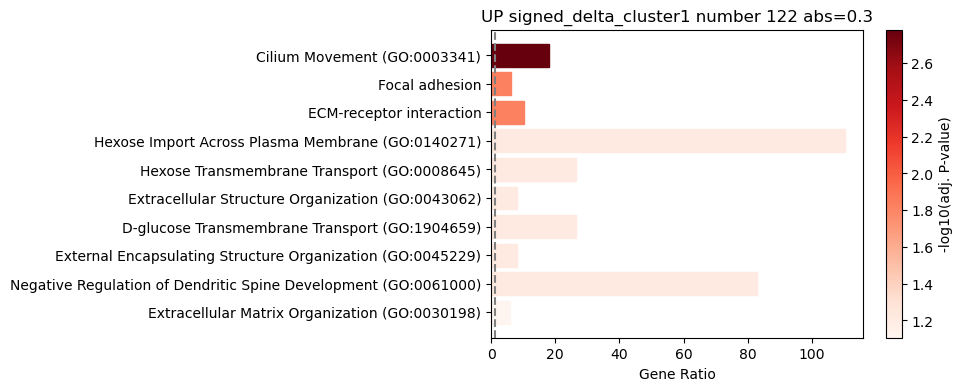

In [23]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [24]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster2", 0.3)

クラスタ signed_delta_cluster2 UP 遺伝子数: 154
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Positive Regulation of Peptide Hormone Secreti...    6/48  0.000002   
1  Maintenance of Gastrointestinal Epithelium (GO...    4/19  0.000012   
2     Extracellular Matrix Organization (GO:0030198)   9/182  0.000012   
3      Epithelial Structure Maintenance (GO:0010669)    4/22  0.000022   
4  External Encapsulating Structure Organization ...   7/111  0.000024   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.001900            0                     0   19.115830   
1          0.003544            0                     0   35.255111   
2          0.003544            0                     0    7.058282   
3          0.003544            0                     0   

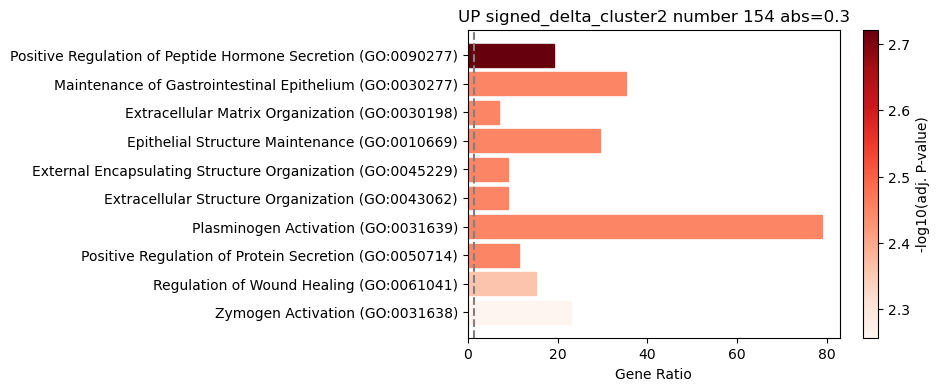

In [25]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [26]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster3", 0.3)

クラスタ signed_delta_cluster3 UP 遺伝子数: 249
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Transport Across Blood-Brain Barrier (GO:0150104)    8/86  0.000012   
1  Hydrogen Peroxide Biosynthetic Process (GO:005...     3/5  0.000019   
2                    Vascular Transport (GO:0010232)    7/84  0.000085   
3  Reactive Oxygen Species Biosynthetic Process (...     3/8  0.000102   
4  Positive Regulation of Epithelial Cell Differe...    4/22  0.000144   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.013439            0                     0    8.372380   
1          0.013439            0                     0  120.420732   
2          0.036600            0                     0    7.390684   
3          0.036600            0                     0   

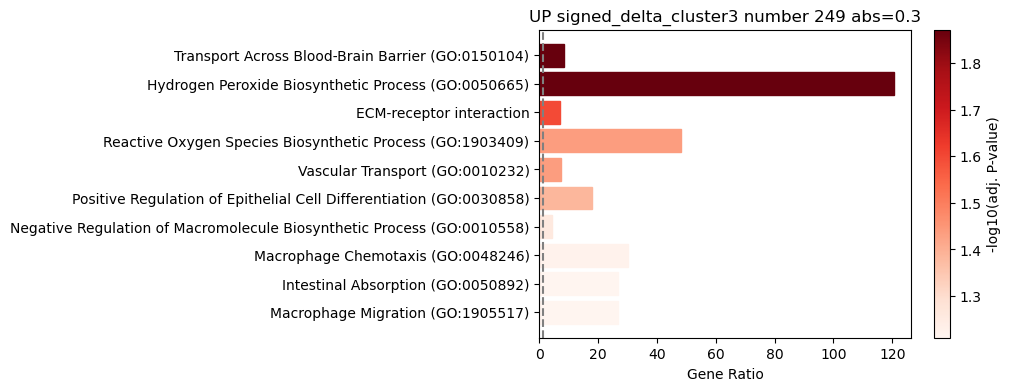

In [27]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [28]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster4", 0.3)

クラスタ signed_delta_cluster4 UP 遺伝子数: 247
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                 Macrophage Chemotaxis (GO:0048246)    4/11  0.000007   
1                  Macrophage Migration (GO:1905517)    4/12  0.000010   
2  Hydrogen Peroxide Biosynthetic Process (GO:005...     3/5  0.000018   
3           Regulation of Wound Healing (GO:0061041)    6/49  0.000030   
4  Maintenance of Gastrointestinal Epithelium (GO...    4/19  0.000076   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.008073            0                     0   46.433862   
1          0.008073            0                     0   40.627572   
2          0.009458            0                     0  121.420082   
3          0.011622            0                     0   

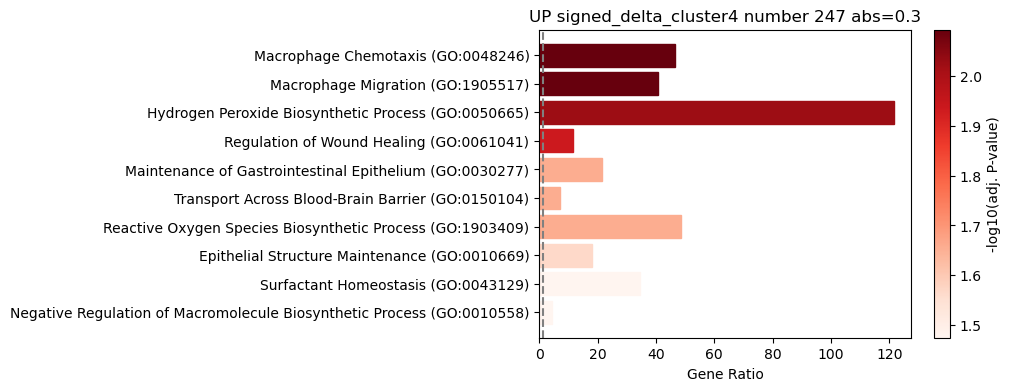

In [29]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [30]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster5", 0.3)

クラスタ signed_delta_cluster5 UP 遺伝子数: 166
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Maintenance of Gastrointestinal Epithelium (GO...    4/19  0.000016   
1      Epithelial Structure Maintenance (GO:0010669)    4/22  0.000030   
2  Positive Regulation of Protein Secretion (GO:0...    6/76  0.000040   
3  Positive Regulation of Peptide Hormone Secreti...    5/48  0.000048   
4                    Vascular Transport (GO:0010232)    6/84  0.000071   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.011706            0                     0   32.623868   
1          0.011706            0                     0   27.182442   
2          0.011706            0                     0   10.587857   
3          0.011706            0                     0   

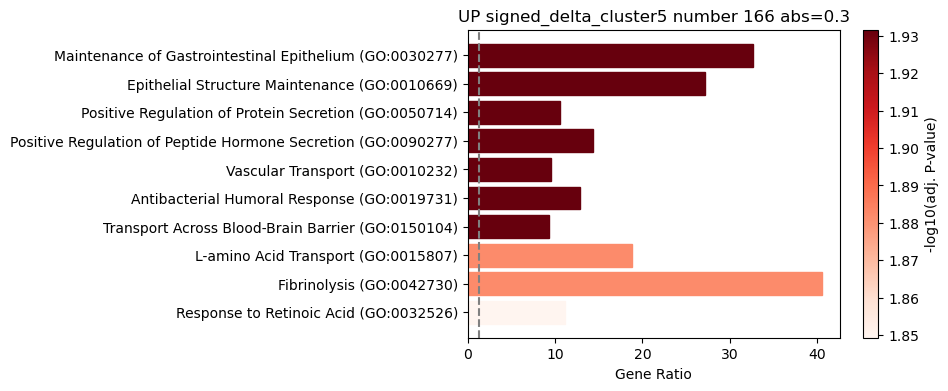

In [31]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [32]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster6", 0.3)

クラスタ signed_delta_cluster6 UP 遺伝子数: 232
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                          Fibrinolysis (GO:0042730)    4/12  0.000008   
1  Positive Regulation of Peptide Hormone Secreti...    6/48  0.000019   
2  Positive Regulation of Protein Secretion (GO:0...    7/76  0.000029   
3                Plasminogen Activation (GO:0031639)     3/8  0.000083   
4  Positive Regulation of Interleukin-1 Productio...    6/63  0.000089   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.010440            0                     0   43.333333   
1          0.011992            0                     0   12.469027   
2          0.012258            0                     0    8.881997   
3          0.022978            0                     0   

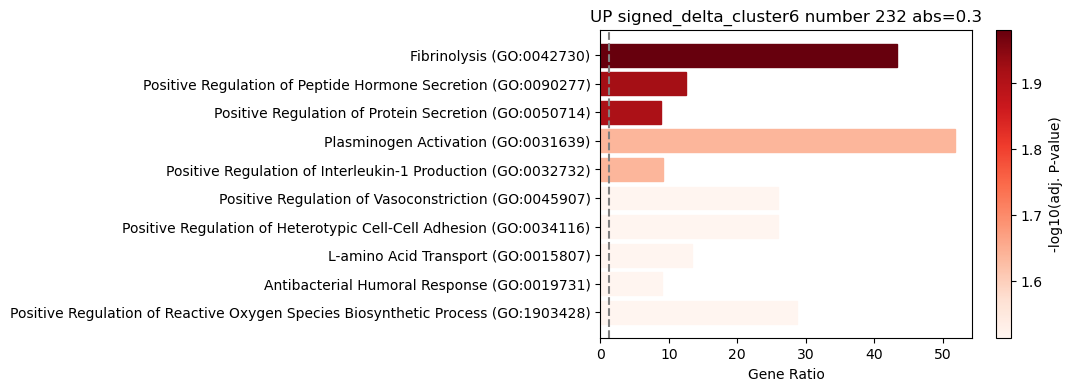

In [33]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [34]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster7", 0.3)

クラスタ signed_delta_cluster7 UP 遺伝子数: 197
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                 Macrophage Chemotaxis (GO:0048246)    4/11  0.000003   
1                  Macrophage Migration (GO:1905517)    4/12  0.000004   
2  Positive Regulation of Cytokine Production (GO...  12/325  0.000096   
3  Positive Regulation of Cell-Cell Adhesion (GO:...    5/50  0.000130   
4                          Fibrinolysis (GO:0042730)    3/12  0.000194   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.002897            0                     0   58.611399   
1          0.002897            0                     0   51.282383   
2          0.043735            0                     0    4.039029   
3          0.044428            0                     0   

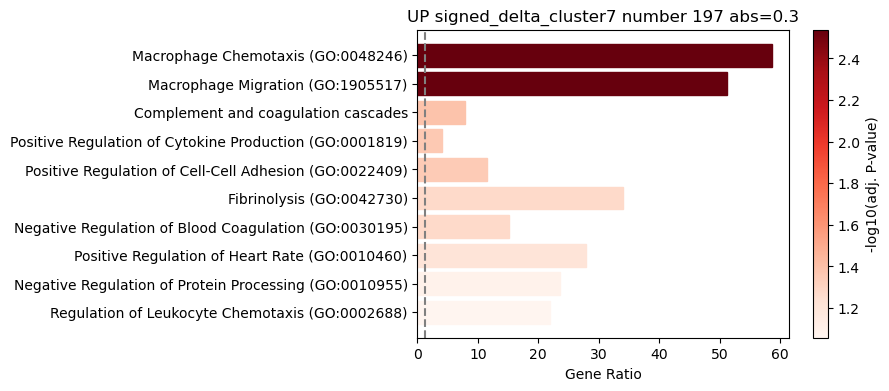

In [35]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [36]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster8", 0.3)

クラスタ signed_delta_cluster8 UP 遺伝子数: 121
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0     L-ascorbic Acid Metabolic Process (GO:0019852)     2/5  0.000359   
1                    Zymogen Activation (GO:0031638)    3/27  0.000568   
2      Monosaccharide Metabolic Process (GO:0005996)     2/7  0.000747   
3                Neuron Differentiation (GO:0030182)   6/181  0.000822   
4  Protein-Containing Complex Organization (GO:00...   5/123  0.000913   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.067047            0                     0  111.350140   
1          0.067047            0                     0   21.032839   
2          0.067047            0                     0   66.803361   
3          0.067047            0                     0   

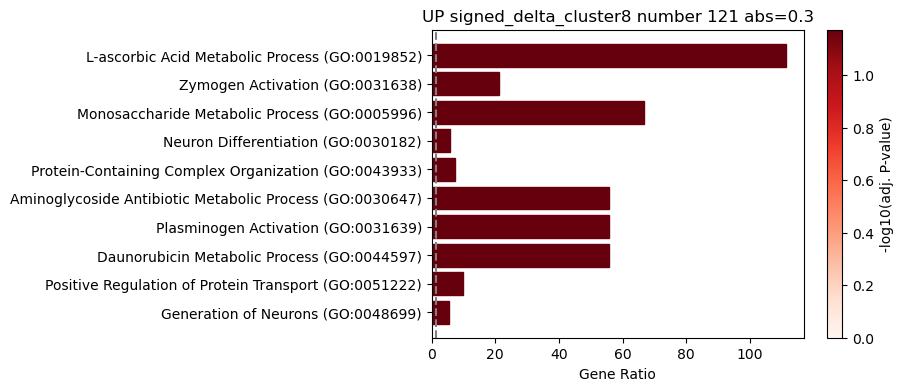

In [37]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [38]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster9", 0.3)

クラスタ signed_delta_cluster9 UP 遺伝子数: 215
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Positive Regulation of Epithelial Cell Differe...    4/22  0.000082   
1      Phasic Smooth Muscle Contraction (GO:0014821)    3/11  0.000190   
2                 Macrophage Chemotaxis (GO:0048246)    3/11  0.000190   
3  Positive Regulation of Reactive Oxygen Species...    3/12  0.000251   
4                  Macrophage Migration (GO:1905517)    3/12  0.000251   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.072255            0                     0   20.818325   
1          0.072255            0                     0   34.982901   
2          0.072255            0                     0   34.982901   
3          0.072255            0                     0   

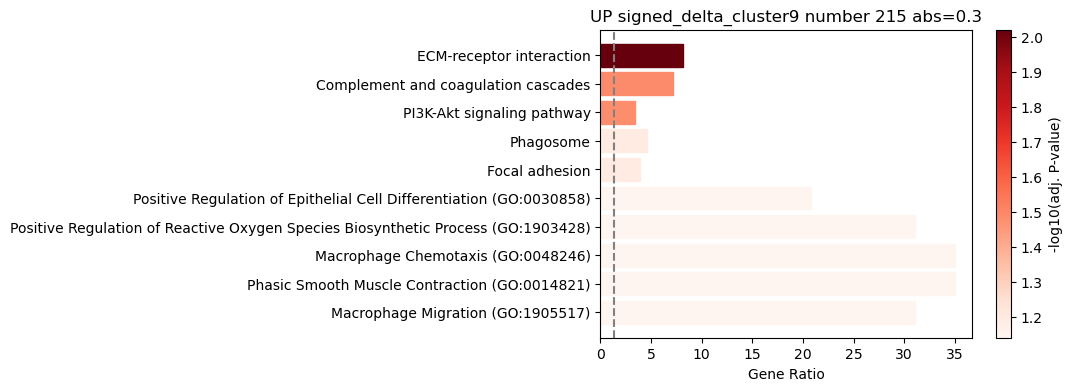

In [39]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [40]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster10", 0.3)

クラスタ signed_delta_cluster10 UP 遺伝子数: 181
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                 Macrophage Chemotaxis (GO:0048246)    3/11  0.000114   
1                  Macrophage Migration (GO:1905517)    3/12  0.000151   
2            Regulation of Phagocytosis (GO:0050764)    5/62  0.000245   
3                  Cell-Matrix Adhesion (GO:0007160)   6/107  0.000429   
4  Negative Regulation of Cardiac Muscle Tissue G...     2/5  0.000800   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.097260            0                     0   41.736657   
1          0.097260            0                     0   37.097378   
2          0.105114            0                     0    9.849482   
3          0.138174            0                     0   

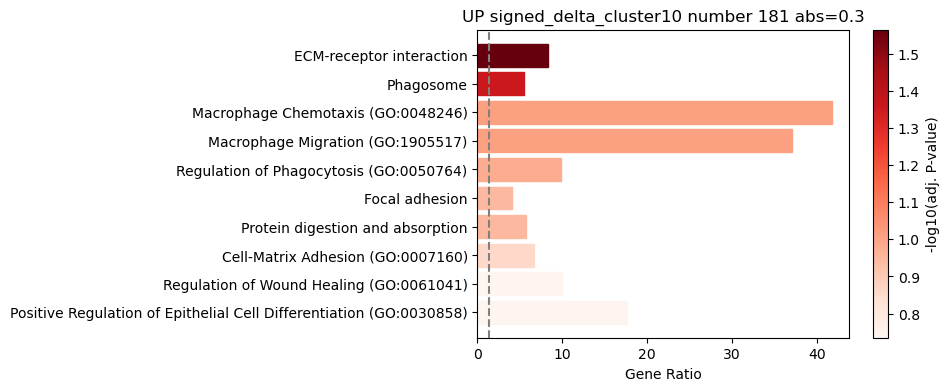

In [41]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [42]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster11", 0.3)

クラスタ signed_delta_cluster11 UP 遺伝子数: 191
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                          Fibrinolysis (GO:0042730)    4/12  0.000004   
1  Positive Regulation of Peptide Hormone Secreti...    6/48  0.000006   
2  Positive Regulation of Protein Secretion (GO:0...    7/76  0.000008   
3  Maintenance of Gastrointestinal Epithelium (GO...    4/19  0.000028   
4                Plasminogen Activation (GO:0031639)     3/8  0.000046   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.003183            0                     0   52.943850   
1          0.003183            0                     0   15.264093   
2          0.003183            0                     0   10.883743   
3          0.008195            0                     0   

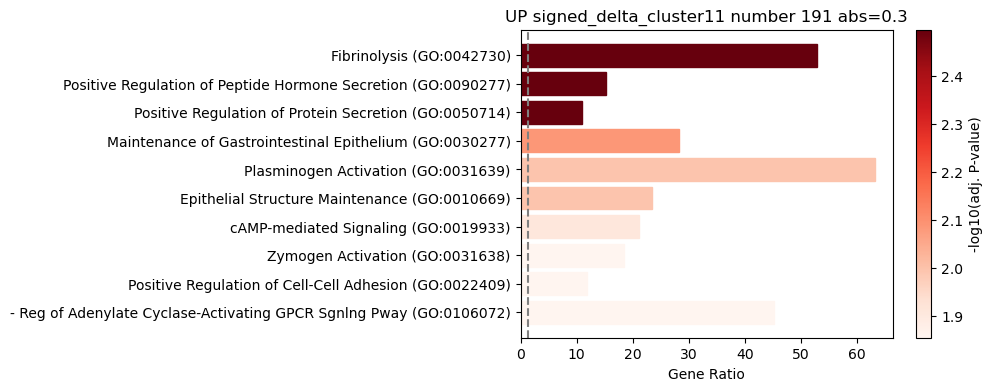

In [43]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [44]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster12", 0.3)

クラスタ signed_delta_cluster12 UP 遺伝子数: 185
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                       Cilium Movement (GO:0003341)    6/63  0.000025   
1                 Macrophage Chemotaxis (GO:0048246)    3/11  0.000122   
2                  Macrophage Migration (GO:1905517)    3/12  0.000161   
3  Hexose Import Across Plasma Membrane (GO:0140271)     2/5  0.000836   
4           Regulation of Wound Healing (GO:0061041)    4/49  0.001085   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.027412            0                     0   11.618936   
1          0.058103            0                     0   40.811126   
2          0.058103            0                     0   36.274725   
3          0.168481            0                     0   

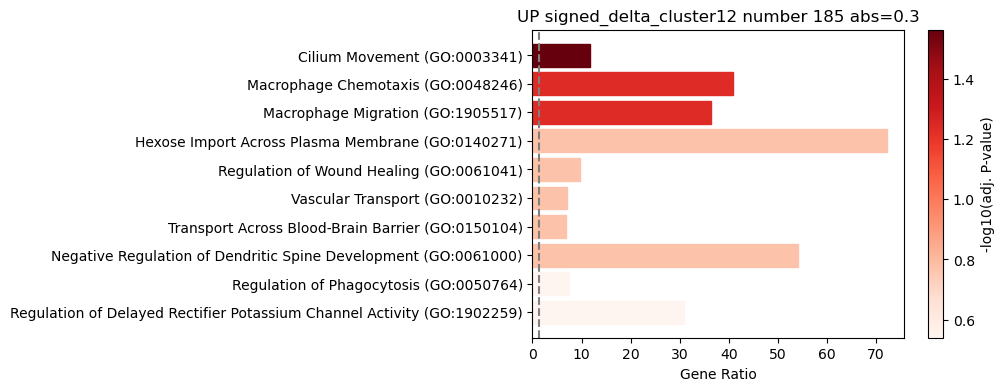

In [45]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [46]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster13", 0.3)

クラスタ signed_delta_cluster13 UP 遺伝子数: 241
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                          Fibrinolysis (GO:0042730)    4/12  0.000009   
1  Hydrogen Peroxide Biosynthetic Process (GO:005...     3/5  0.000017   
2              Regulation of Exocytosis (GO:0017157)    6/48  0.000023   
3  Positive Regulation of Cell-Cell Adhesion (GO:...    6/50  0.000029   
4  Negative Regulation of Blood Coagulation (GO:0...    5/31  0.000032   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.009104            0                     0   41.668776   
1          0.009104            0                     0  124.518908   
2          0.009104            0                     0   11.986018   
3          0.009104            0                     0   

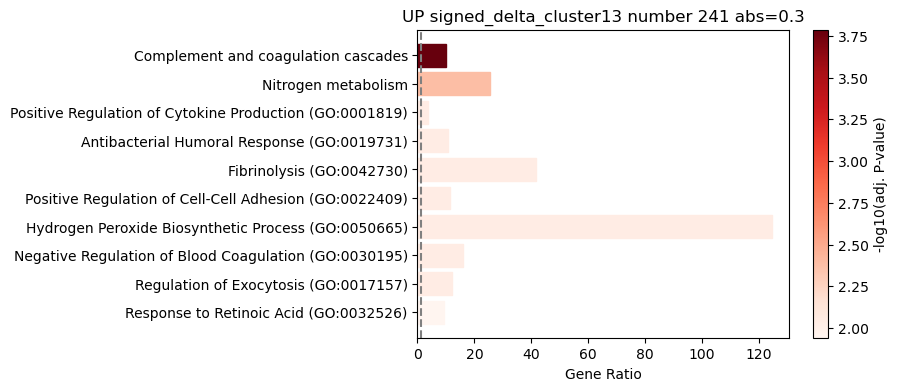

In [47]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [48]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster14", 0.3)

クラスタ signed_delta_cluster14 UP 遺伝子数: 242
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Positive Regulation of Cell-Cell Adhesion (GO:...    7/50  0.000002   
1                          Fibrinolysis (GO:0042730)    4/12  0.000010   
2  Hydrogen Peroxide Biosynthetic Process (GO:005...     3/5  0.000017   
3              Regulation of Exocytosis (GO:0017157)    6/48  0.000024   
4  Positive Regulation of Protein Transport (GO:0...    7/73  0.000029   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.003421            0                     0   13.657100   
1          0.007346            0                     0   41.491597   
2          0.008191            0                     0  123.991632   
3          0.008191            0                     0   

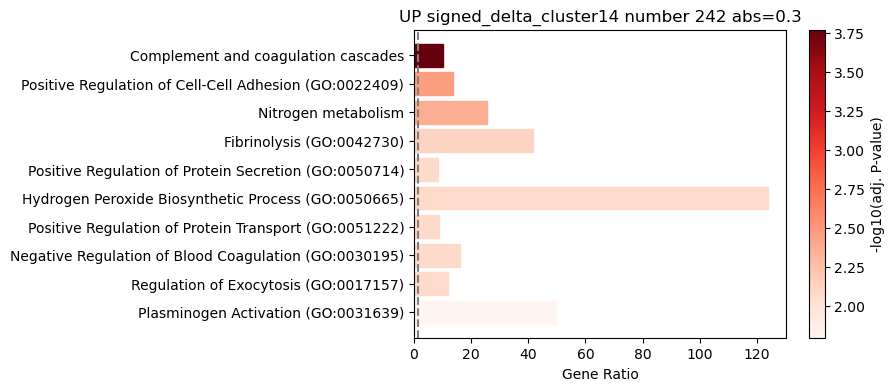

In [49]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [50]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_rna, "UP", "signed_delta_cluster15", 0.3)

クラスタ signed_delta_cluster15 UP 遺伝子数: 167
gene_id


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0     Extracellular Matrix Organization (GO:0030198)  10/182  0.000003   
1  External Encapsulating Structure Organization ...   8/111  0.000004   
2  Extracellular Structure Organization (GO:0043062)   8/111  0.000004   
3                Plasminogen Activation (GO:0031639)     3/8  0.000031   
4                  Cell-Matrix Adhesion (GO:0007160)   7/107  0.000032   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.001655            0                     0    7.280773   
1          0.001655            0                     0    9.637907   
2          0.001655            0                     0    9.637907   
3          0.007543            0                     0   

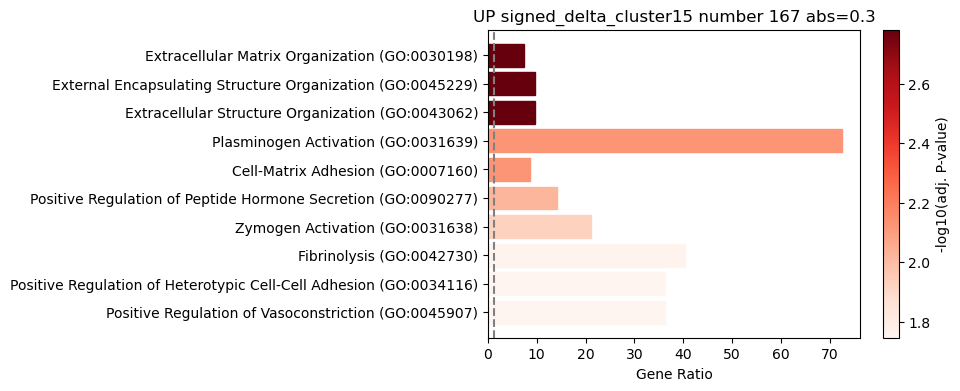

In [51]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)